# Table of Content

1. Import libraries and data
2. Age Distribution
3. Credit Score: Age, Country
4. Country, Gender

# 1. Import libraries and data

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Import Prepared Data (Path)

path = r'/Users/ladyarmanoid/Documents/Data Analytics/CareerFoundry/Course/2- Data Immersion/Achievement 5/AML Pig E. Bank Analysis/'

# Import data

df_checked = pd.read_excel(os.path.join(path, '02 Data','Prepared Data', 'df_checked.xlsx'))

df_exited_cx_checked = pd.read_excel(os.path.join(path, '02 Data','Prepared Data', 'df_exited_cx_checked.xlsx'))

df_active_cx_checked = pd.read_excel(os.path.join(path, '02 Data','Prepared Data', 'df_active_cx_checked.xlsx'))

# 2. Age Distribution

## ALL CUSTOMERS

In [3]:
df_checked.head()

,Unnamed: 0,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,Number of Products,Has Credit Card,Active Member,Estimated Salary,status_flag
0,0,15647311,608,Spain,Female,41,1,83807.86,1,0,1,"$112.542,58",active customer
1,1,15701354,699,France,Female,39,1,-,2,0,0,"$93.826,63",active customer
2,2,15737888,850,Spain,Female,43,2,125510.82,1,1,1,"$79.084,10",active customer
3,3,15592531,822,France,Male,50,7,-,2,1,1,"$10.062,80",active customer
4,4,15792365,501,France,Male,44,4,142051.07,2,0,1,"$74.940,50",active customer


In [4]:
# Remove unnamed column

df_checked = df_checked.drop(columns =['Unnamed: 0'])

In [5]:
# Remove the '$' sign from the "Estimated Salary" column

df_checked['Estimated Salary'] = df_checked['Estimated Salary'].str.replace('$', '')

In [6]:
# Convert the "Estimated Salary" column to numeric format

df_checked['Estimated Salary'] = pd.to_numeric(df_checked['Estimated Salary'], errors='coerce')

In [7]:
# Rename the column to indicate values are in dollars

df_checked.rename(columns={'Estimated Salary': 'salary_USD'}, inplace=True)

In [8]:
df_checked.head()

,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,Number of Products,Has Credit Card,Active Member,salary_USD,status_flag
0,15647311,608,Spain,Female,41,1,83807.86,1,0,1,NaN,active customer
1,15701354,699,France,Female,39,1,-,2,0,0,NaN,active customer
2,15737888,850,Spain,Female,43,2,125510.82,1,1,1,NaN,active customer
3,15592531,822,France,Male,50,7,-,2,1,1,NaN,active customer
4,15792365,501,France,Male,44,4,142051.07,2,0,1,NaN,active customer


In [9]:
df_checked['salary_USD']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
986   NaN
987   NaN
988   NaN
989   NaN
990   NaN
Name: salary_USD, Length: 991, dtype: float64

In [10]:
df_checked['salary_USD'].sum()

0.0

### IMPORT of 'df_checked_updated' data 

In [11]:
# Import data

df_checked_2 = pd.read_excel(os.path.join(path, '02 Data','Prepared Data', 'df_checked_updated.xlsx'))

In [12]:
# Remove the '$' sign from the "Estimated Salary" column

df_checked_2['Estimated Salary'] = df_checked_2['Estimated Salary'].str.replace('$', '')

In [13]:
# Convert the "Estimated Salary" column to numeric format

df_checked_2['Estimated Salary'] = pd.to_numeric(df_checked_2['Estimated Salary'], errors='coerce')

In [14]:
# Rename the column to indicate values are in dollars

df_checked_2.rename(columns={'Estimated Salary': 'salary_USD'}, inplace=True)

In [15]:
df_checked_2['salary_USD'].sum()

0.0

The sum equals to zero even after reuploading the data, after changing it to the number format. The removal of the $ sign from the 'Estimated Salary' column that became the new 'salary_USD' is still not usable.

### REIMPORT of 'df_checked' data

The original data was reimported after removing the $ sign in the excel file.

In [16]:
# Re-import data

df_checked = pd.read_excel(os.path.join(path, '02 Data','Prepared Data', 'df_checked.xlsx'))

In [17]:
# Rename the column to indicate values are in dollars

df_checked.rename(columns={'Estimated Salary': 'salary_USD'}, inplace=True)

In [18]:
df_checked['salary_USD'].sum()

97490223.03999999

In [19]:
# Create age groups

# Age group -> 18 to 25 years old
df_checked.loc[(df_checked['Age'] >= 18) & (df_checked['Age'] <= 25), 'age_group'] = '18-25 years old'

# Age group -> 26 to 36 years old
df_checked.loc[(df_checked['Age'] >= 26) & (df_checked['Age'] <= 36), 'age_group'] = '26-36 years old'

# Age group -> 37 to 44 years old
df_checked.loc[(df_checked['Age'] >= 37) & (df_checked['Age'] <= 44), 'age_group'] = '37-44 years old'

# Age group -> 45 to 59 years old
df_checked.loc[(df_checked['Age'] >= 45) & (df_checked['Age'] <= 59), 'age_group'] = '45-59 years old'

# Age group -> 60 to 71 years old
df_checked.loc[(df_checked['Age'] >= 60) & (df_checked['Age'] <= 71), 'age_group'] = '60-71 years old'

# Age group -> 72 to 82 years old
df_checked.loc[(df_checked['Age'] >= 72) & (df_checked['Age'] <= 82), 'age_group'] = '72-82 years old'

# Check output
df_checked['age_group'].value_counts(dropna = False)


age_group
26-36 years old    397
37-44 years old    302
45-59 years old    182
18-25 years old     58
60-71 years old     43
72-82 years old      9
Name: count, dtype: int64

In [20]:
# Calculate the percentage distribution of age groups

percentage_distribution_age = (df_checked['age_group'].value_counts(normalize = True) * 100).sort_index()

In [21]:
# Define four different shades of purple

colors = ['#6A5ACD', 'plum', 'purple', 'pink']

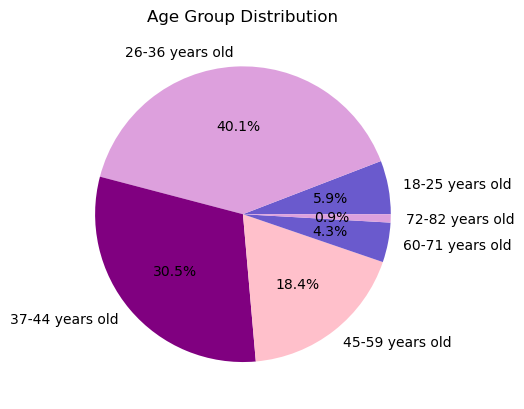

In [22]:
# Plot the pie chart with specified colors

pie_age_groups = plt.pie(percentage_distribution_age, labels = percentage_distribution_age.index, autopct = '%1.1f%%', colors = colors)
plt.title('Age Group Distribution')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_age_group.png'))

plt.show()

In [23]:
# Create profile active and exited customers


# Active/Exited with age '18-25 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'teen_young_adult_Germany'

# Active/Exited with age '18-25 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'teen_young_adult_France'

# Active/Exited with age '18-25 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'teen_young_adult_Spain'

# Active/Exited with age '26-36 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'young_adult_Germany'

# Active/Exited with age '26-36 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'young_adult_France'

# Active/Exited with age '26-36 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'young_adult_Spain'

# Active/Exited with age '37-44 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'adult_Germany'

# Active/Exited with age '37-44 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'adult_France'

# Active/Exited with age '37-44 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'adult_Spain'

# Active/Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'middle_age_adult_Germany'

# Active/Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'middle_age_adult_France'

# Active/Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'middle_age_adult_Spain'

# Active/Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'mid_senior_adult_Germany'

# Active/Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'mid_senior_adult_France'

# Active/Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'mid_senior_adult_Spain'

# Active/Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Germany'), 'profile_age_status']= 'senior_adult_Germany'

# Active/Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'France'), 'profile_age_status']= 'senior_adult_France'

# Active/Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['active customer', 'exited customer'])) & (df_checked['Country'] == 'Spain'), 'profile_age_status']= 'senior_adult_Spain'

# Check output

df_checked['profile_age_status'].value_counts(dropna = False)

profile_age_status
young_adult_France          190
adult_France                139
young_adult_Germany         108
young_adult_Spain            99
middle_age_adult_France      96
adult_Spain                  83
adult_Germany                80
middle_age_adult_Germany     45
middle_age_adult_Spain       41
teen_young_adult_France      31
mid_senior_adult_France      18
teen_young_adult_Spain       15
mid_senior_adult_Spain       15
teen_young_adult_Germany     12
mid_senior_adult_Germany     10
senior_adult_France           6
senior_adult_Germany          2
senior_adult_Spain            1
Name: count, dtype: int64

In [25]:
# Customer 'profile_age_status' and 'salary_USD'

customer_profile_salary = df_checked.groupby('profile_age_status')['salary_USD'].sum()

In [26]:
customer_profile_salary_sorted = customer_profile_salary.sort_values(ascending = True)

In [27]:
colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(customer_profile_salary_sorted)))

In [28]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

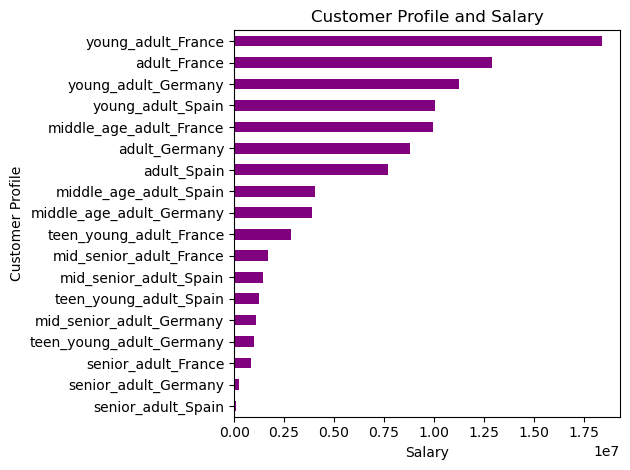

In [29]:
bar_customer_profile = customer_profile_salary_sorted.plot.barh(title = 'Customer Profile and Salary', xlabel = 'Salary', ylabel = 'Customer Profile', color = 'purple')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile.png'))

plt.show()

In [33]:
customer_profile_salary

profile_age_status
adult_France               12895576.07
adult_Germany               8826401.49
adult_Spain                 7712739.46
mid_senior_adult_France     1715623.11
mid_senior_adult_Germany    1082856.59
mid_senior_adult_Spain      1429106.20
middle_age_adult_France     9973985.88
middle_age_adult_Germany    3904611.77
middle_age_adult_Spain      4027259.91
senior_adult_France          828157.67
senior_adult_Germany         248018.35
senior_adult_Spain           114675.75
teen_young_adult_France     2824677.45
teen_young_adult_Germany     988861.53
teen_young_adult_Spain      1219625.23
young_adult_France         18399240.52
young_adult_Germany        11261686.09
young_adult_Spain          10037119.97
Name: salary_USD, dtype: float64

In [34]:
customer_profile_salary.sum()

97490223.04

In [ ]:
## Income groups

In [64]:
# Check minimum 'salary_USD'
    
df_checked['salary_USD'].min()

371.05

In [65]:
# Check average 'salary_USD'
    
df_checked['salary_USD'].mean()

98574.54301314458

In [66]:
# Check maximum 'salary_USD'
    
df_checked['salary_USD'].max()

199725.39

Salaries are ranging between 371.05 and 199725.39 USD.

In [68]:
# Income group under $20K

df_checked.loc[df_checked['salary_USD'] < 20000,'income_group'] = 'lower income'

# Income group between $20 and $100K

df_checked.loc[(df_checked['salary_USD'] >= 20000) & (df_checked['salary_USD'] < 100000),'income_group'] = 'middle income'

# Income group above $100K

df_checked.loc[df_checked['salary_USD'] >= 100000, 'income_group'] = 'high income'

# Check output

df_checked['income_group'].value_counts(dropna = False)

income_group
high income      486
middle income    390
lower income     113
nan                2
Name: count, dtype: int64

In [69]:
# Create a dataframe for the missing values in 'salary_USD'

df_nan = df_checked[df_checked['salary_USD'].isnull() == True]

# Check output

df_nan

,Unnamed: 0,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,Number of Products,Has Credit Card,Active Member,salary_USD,status_flag,age_group,profile_age_status,cs_group,income_group
16,16,15597945,636,Spain,Female,32,8,-,2,1,0,NaN,active customer,26-36 years old,young_adult_Spain,586-656,nan
169,169,15785542,654,Germany,Male,26,4,118287.01,2,0,0,NaN,active customer,26-36 years old,young_adult_Germany,586-656,nan


### Impute the mean salary range to the two customers

In [70]:
# Calculate the mean of the 'salary_USD' column

mean = df_checked['salary_USD'].mean()

# Fill NaN values with the mean of 'salary_USD' column

df_checked.fillna(mean, inplace = True)

In [72]:
# Income group under $20K

df_checked.loc[df_checked['salary_USD'] < 20000,'income_group'] = 'lower income'

# Income group between $20 and $100K

df_checked.loc[(df_checked['salary_USD'] >= 20000) & (df_checked['salary_USD'] < 100000),'income_group'] = 'middle income'

# Income group above $100K

df_checked.loc[df_checked['salary_USD'] >= 100000, 'income_group'] = 'high income'

# Check output

df_checked['income_group'].value_counts(dropna = False)

income_group
high income      486
middle income    392
lower income     113
Name: count, dtype: int64

In [73]:
# Create profile for exited customers


# Exited with age '18-25 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_teen_young_adult_Germany'

# Exited with age '18-25 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_teen_young_adult_France'

# Exited with age '18-25 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_teen_young_adult_Spain'

# Exited with age '26-36 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_young_adult_Germany'

# Exited with age '26-36 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_young_adult_France'

# Exited with age '26-36 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_young_adult_Spain'

# Exited with age '37-44 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_adult_Germany'

# Exited with age '37-44 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_adult_France'

# Exited with age '37-44 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_adult_Spain'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_middle_age_adult_Germany'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_middle_age_adult_France'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_middle_age_adult_Spain'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_mid_senior_adult_Germany'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_mid_senior_adult_France'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_mid_senior_adult_Spain'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'exited_profile_age_status']= 'exited_senior_adult_Germany'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'exited_profile_age_status']= 'exited_senior_adult_France'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'exited_profile_age_status']= 'exited_senior_adult_Spain'

# Check output

df_checked['exited_profile_age_status'].value_counts(dropna = False)

exited_profile_age_status
nan                                787
exited_middle_age_adult_France      38
exited_middle_age_adult_Germany     28
exited_adult_Germany                25
exited_adult_France                 21
exited_middle_age_adult_Spain       18
exited_adult_Spain                  17
exited_young_adult_Germany          14
exited_young_adult_France           11
exited_young_adult_Spain             9
exited_mid_senior_adult_Spain        7
exited_mid_senior_adult_Germany      7
exited_mid_senior_adult_France       7
exited_teen_young_adult_Spain        1
exited_teen_young_adult_Germany      1
Name: count, dtype: int64

The NaN value represents the active customers.

### Making 'income_group' 'exited_profile_age_status' chart

In [74]:
# Create a dataframe to group the data by 'exited_profile_age_status' and 'salary_USD'

df_ex_cx_salary = df_checked.groupby(['income_group', 'exited_profile_age_status']).size().unstack()

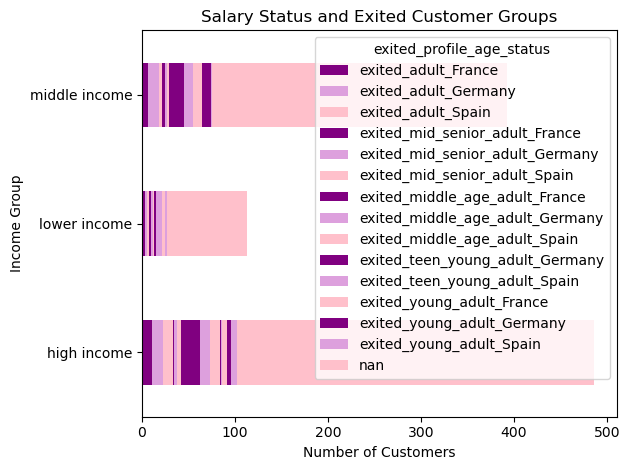

In [75]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
bar_chart_exited_salary = df_ex_cx_salary.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Salary Status and Exited Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_exited_salary.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

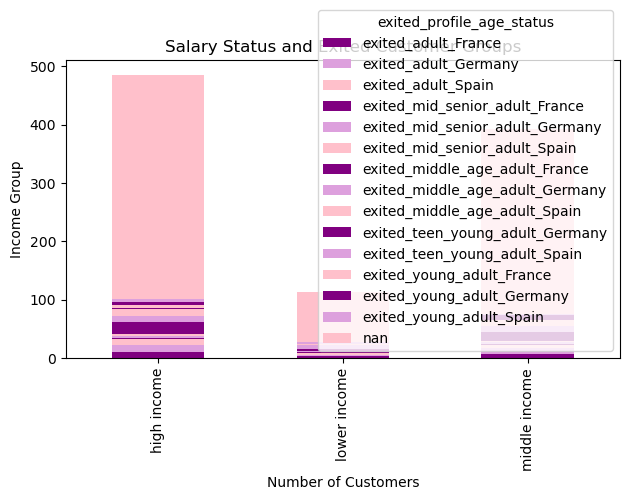

In [76]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
bar_chart_exited_salary_2 = df_ex_cx_salary.plot(kind = 'bar', stacked = True, color = colors)
plt.title('Salary Status and Exited Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_exited_salary_2.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

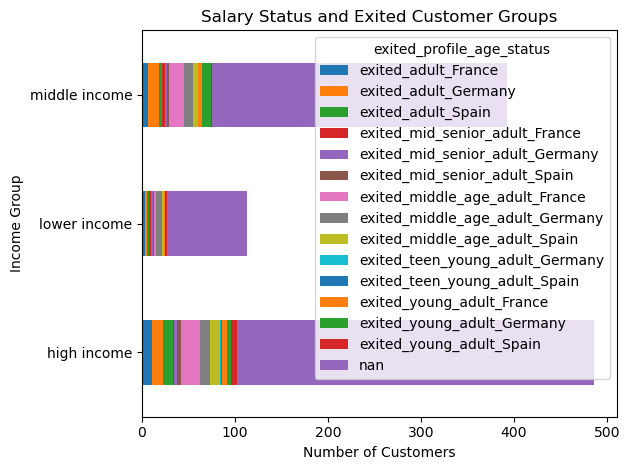

In [79]:
# Plot the data using a bar chart

bar_chart_exited_salary_3 = df_ex_cx_salary.plot(kind = 'barh', stacked = True)
plt.title('Salary Status and Exited Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_chart_exited_salary_3.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

In [80]:
# Create profile for exited customers + all active customers in one profile


# Exited with age '18-25 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_teen_young_adult_Germany'

# Exited with age '18-25 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_teen_young_adult_France'

# Exited with age '18-25 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['18-25 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_teen_young_adult_Spain'

# Exited with age '26-36 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_young_adult_Germany'

# Exited with age '26-36 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_young_adult_France'

# Exited with age '26-36 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['26-36 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_young_adult_Spain'

# Exited with age '37-44 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_adult_Germany'

# Exited with age '37-44 years old' in France

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_adult_France'

# Exited with age '37-44 years old' in Spain

df_checked.loc[(df_checked['age_group'].isin(['37-44 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_adult_Spain'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_middle_age_adult_Germany'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_middle_age_adult_France'

# Exited with age '45-59 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['45-59 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_middle_age_adult_Spain'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_mid_senior_adult_Germany'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_mid_senior_adult_France'

# Exited with age '60-71 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['60-71 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_mid_senior_adult_Spain'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Germany'), 'all_profile_age_status']= 'exited_senior_adult_Germany'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'France'), 'all_profile_age_status']= 'exited_senior_adult_France'

# Exited with age '72-82 years old' in Germany

df_checked.loc[(df_checked['age_group'].isin(['72-82 years old'])) & (df_checked['status_flag'].isin(['exited customer'])) & (df_checked['Country'] == 'Spain'), 'all_profile_age_status']= 'exited_senior_adult_Spain'

# All active customers

df_checked.loc[(df_checked['status_flag'].isin(['active customer'])), 'all_profile_age_status']= 'active_customers'


# Check output

df_checked['all_profile_age_status'].value_counts(dropna = False)

all_profile_age_status
active_customers                   787
exited_middle_age_adult_France      38
exited_middle_age_adult_Germany     28
exited_adult_Germany                25
exited_adult_France                 21
exited_middle_age_adult_Spain       18
exited_adult_Spain                  17
exited_young_adult_Germany          14
exited_young_adult_France           11
exited_young_adult_Spain             9
exited_mid_senior_adult_Spain        7
exited_mid_senior_adult_Germany      7
exited_mid_senior_adult_France       7
exited_teen_young_adult_Spain        1
exited_teen_young_adult_Germany      1
Name: count, dtype: int64

In [81]:
# Create a dataframe to group the data by 'exited_profile_age_status' and 'salary_USD'

df_all_profile_salary = df_checked.groupby(['income_group', 'all_profile_age_status']).size().unstack()

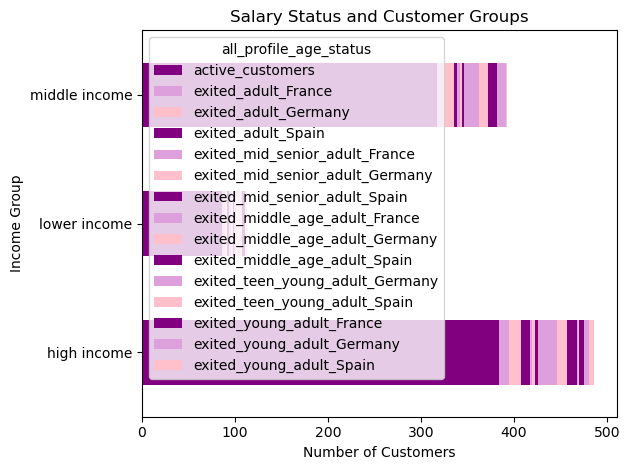

In [82]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
customer_group_salary = df_all_profile_salary.plot(kind = 'barh', stacked = True, color = colors)
plt.title('Salary Status and Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_group_salary.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

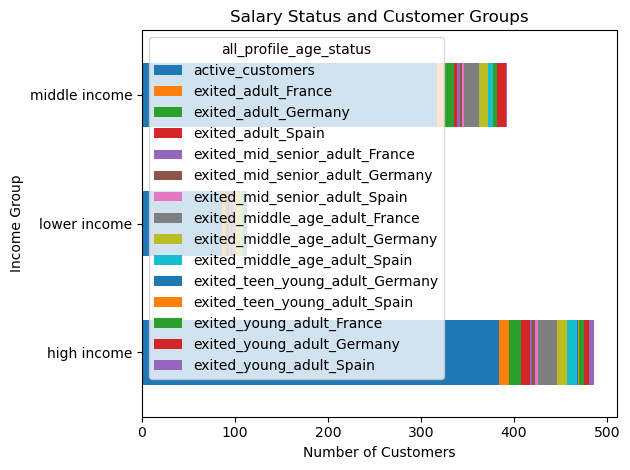

In [84]:
# Plot the data using a bar chart

colors = ['purple', 'plum','pink']
customer_group_salary_3 = df_all_profile_salary.plot(kind = 'barh', stacked = True)
plt.title('Salary Status and Customer Groups')
plt.xlabel('Number of Customers')
plt.ylabel('Income Group')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_group_salary_3.png'), bbox_inches='tight', pad_inches=0.1)
plt.show()

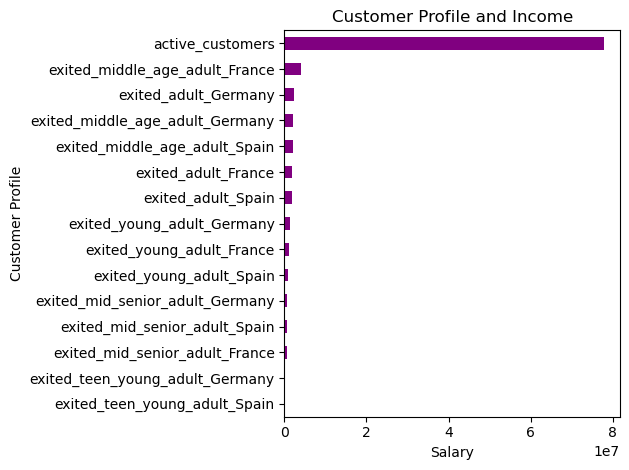

In [86]:
# Customer 'all_profile_age_status' and 'income_group'

customer_profile_income = df_checked.groupby('all_profile_age_status')['salary_USD'].sum()

customer_profile_income_sorted = customer_profile_income.sort_values(ascending = True)

colors = plt.cm.Reds(np.linspace(0.8, 0.3, len(customer_profile_income_sorted)))

bar_customer_profile_income = customer_profile_income_sorted.plot.barh(title = 'Customer Profile and Income', xlabel = 'Salary', ylabel = 'Customer Profile', color = 'purple')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_customer_profile_income.png'))

plt.show()

## EXITED CUSTOMERS

In [24]:
df_exited_cx_checked.head()

,Unnamed: 0,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,Number of Products,Has Credit Card,Active Member,Estimated Salary,status_flag
0,787,15634602,619,France,Female,42,2,$-,1,1,1,"$101.348,88",exited customer
1,788,15619304,502,France,Female,42,8,"$159.660,80",3,1,0,"$113.931,57",exited customer
2,789,15574012,645,Spain,Male,44,8,"$113.755,78",2,1,0,"$149.756,71",exited customer
3,790,15656148,376,Germany,Female,29,4,"$115.046,74",4,1,0,"$119.346,88",exited customer
4,791,15737452,653,Germany,Male,58,1,"$132.602,88",1,1,0,"$5.097,67",exited customer


In [35]:
# Remove unnamed column

df_exited_cx_checked = df_exited_cx_checked.drop(columns =['Unnamed: 0'])

In [36]:
# Create age groups

# Age group -> 18 to 25 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 18) & (df_exited_cx_checked['Age'] <= 25), 'age_group'] = '18-25 years old'

# Age group -> 26 to 36 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 26) & (df_exited_cx_checked['Age'] <= 36), 'age_group'] = '26-36 years old'

# Age group -> 37 to 44 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 37) & (df_exited_cx_checked['Age'] <= 44), 'age_group'] = '37-44 years old'

# Age group -> 45 to 59 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 45) & (df_exited_cx_checked['Age'] <= 59), 'age_group'] = '45-59 years old'

# Age group -> 60 to 71 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 60) & (df_exited_cx_checked['Age'] <= 71), 'age_group'] = '60-71 years old'

# Age group -> 72 to 82 years old
df_exited_cx_checked.loc[(df_exited_cx_checked['Age'] >= 72) & (df_exited_cx_checked['Age'] <= 82), 'age_group'] = '72-82 years old'

# Check output
df_exited_cx_checked['age_group'].value_counts(dropna = False)


age_group
45-59 years old    84
37-44 years old    63
26-36 years old    34
60-71 years old    21
18-25 years old     2
Name: count, dtype: int64

In [37]:
# Calculate the percentage distribution of age groups

exited_distribution_age = (df_exited_cx_checked['age_group'].value_counts(normalize = True) * 100).sort_index()

In [38]:
# Define four different shades of blue

colors = ['#d9ead3', '#6a5acd', '#49c2d3', '#088a9d', '#89e7f5']

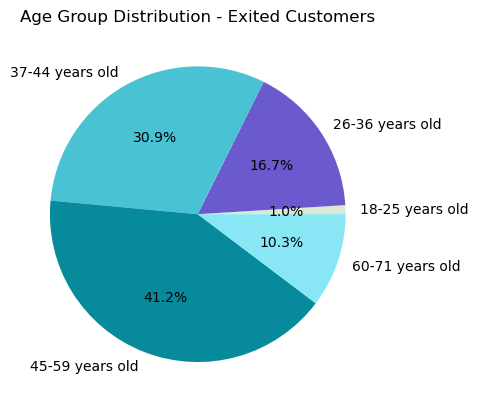

In [39]:
# Plot the pie chart with specified colors

pie_age_exited_group = plt.pie(exited_distribution_age, labels = exited_distribution_age.index, autopct = '%1.1f%%', colors = colors)
plt.title('Age Group Distribution - Exited Customers')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'exit_age_group.png'))

plt.show()

## ACTIVE CUSTOMERS

In [40]:
df_active_cx_checked.head()

,Unnamed: 0,Customer_ID,Credit Score,Country,Gender,Age,Tenure,Balance,Number of Products,Has Credit Card,Active Member,Estimated Salary,status_flag
0,0,15647311,608,Spain,Female,41,1,"$83.807,86",1,0,1,"$112.542,58",active customer
1,1,15701354,699,France,Female,39,1,$-,2,0,0,"$93.826,63",active customer
2,2,15737888,850,Spain,Female,43,2,"$125.510,82",1,1,1,"$79.084,10",active customer
3,3,15592531,822,France,Male,50,7,$-,2,1,1,"$10.062,80",active customer
4,4,15792365,501,France,Male,44,4,"$142.051,07",2,0,1,"$74.940,50",active customer


In [41]:
# Remove unnamed column

df_active_cx_checked = df_active_cx_checked.drop(columns =['Unnamed: 0'])

In [42]:
# Create age groups

# Age group -> 18 to 25 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 18) & (df_active_cx_checked['Age'] <= 25), 'age_group'] = '18-25 years old'

# Age group -> 26 to 36 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 26) & (df_active_cx_checked['Age'] <= 36), 'age_group'] = '26-36 years old'

# Age group -> 37 to 44 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 37) & (df_active_cx_checked['Age'] <= 44), 'age_group'] = '37-44 years old'

# Age group -> 45 to 59 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 45) & (df_active_cx_checked['Age'] <= 59), 'age_group'] = '45-59 years old'

# Age group -> 60 to 71 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 60) & (df_active_cx_checked['Age'] <= 71), 'age_group'] = '60-71 years old'

# Age group -> 72 to 82 years old
df_active_cx_checked.loc[(df_active_cx_checked['Age'] >= 72) & (df_active_cx_checked['Age'] <= 82), 'age_group'] = '72-82 years old'

# Check output
df_active_cx_checked['age_group'].value_counts(dropna = False)


age_group
26-36 years old    363
37-44 years old    239
45-59 years old     98
18-25 years old     56
60-71 years old     22
72-82 years old      9
Name: count, dtype: int64

In [43]:
# Calculate the percentage distribution of age groups

active_distribution_age = (df_active_cx_checked['age_group'].value_counts(normalize = True) * 100).sort_index()

In [44]:
# Define four different shades of purple

colors = ['#6A5ACD', 'plum', 'purple', 'pink']

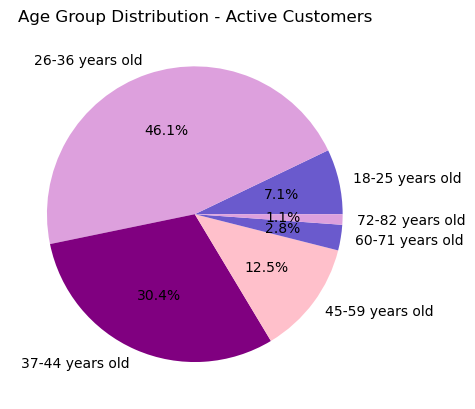

In [45]:
# Plot the pie chart with specified colors

pie_age_groups = plt.pie(active_distribution_age, labels = active_distribution_age.index, autopct = '%1.1f%%', colors = colors)
plt.title('Age Group Distribution - Active Customers')
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'active_age_group.png'))

plt.show()

# 3. Credit Score: Age, Country

## ALL CUSTOMERS

In [47]:
# Create credit score groups

# credit score group -> 376 to 446
df_checked.loc[(df_checked['Credit Score'] >= 376) & (df_checked['Credit Score'] <= 446), 'cs_group'] = '376-446'

# credit score group -> 446 to 516
df_checked.loc[(df_checked['Credit Score'] >= 446) & (df_checked['Credit Score'] <= 516), 'cs_group'] = '446-516'

# credit score group -> 516 to 586
df_checked.loc[(df_checked['Credit Score'] >= 516) & (df_checked['Credit Score'] <= 586), 'cs_group'] = '516-586'

# credit score group -> 586 to 656
df_checked.loc[(df_checked['Credit Score'] >= 586) & (df_checked['Credit Score'] <= 656), 'cs_group'] = '586-656'

# credit score group -> 656 to 726
df_checked.loc[(df_checked['Credit Score'] >= 656) & (df_checked['Credit Score'] <= 726), 'cs_group'] = '656-726'

# credit score group -> 726 to 796
df_checked.loc[(df_checked['Credit Score'] >= 726) & (df_checked['Credit Score'] <= 796), 'cs_group'] = '726-796'

# credit score group -> 796 to 866
df_checked.loc[(df_checked['Credit Score'] >= 796) & (df_checked['Credit Score'] <= 866), 'cs_group'] = '796-866'

# Check output
df_checked['cs_group'].value_counts(dropna = False)

cs_group
656-726    257
586-656    234
726-796    171
516-586    164
446-516     83
796-866     62
376-446     20
Name: count, dtype: int64

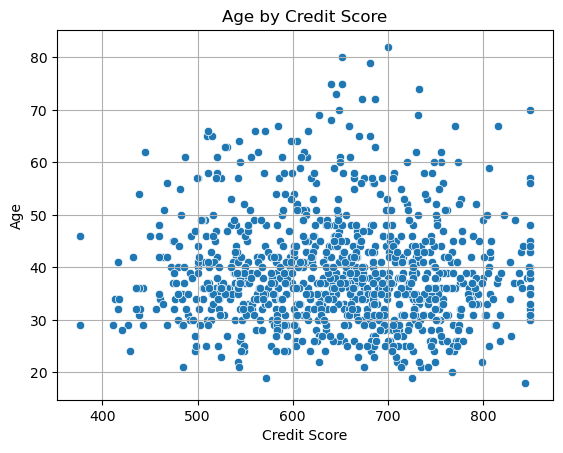

In [48]:
#### Scatterplot: Age vs. Credit Score

age_credit_score = sns.scatterplot(x = 'Credit Score', y = 'Age', data = df_checked)
plt.title('Age by Credit Score')
age_credit_score.set(xlabel = 'Credit Score', ylabel = 'Age')
plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/age_credit_score.png'))

# Show the graph

plt.show()

## EXITED CUSTOMERS

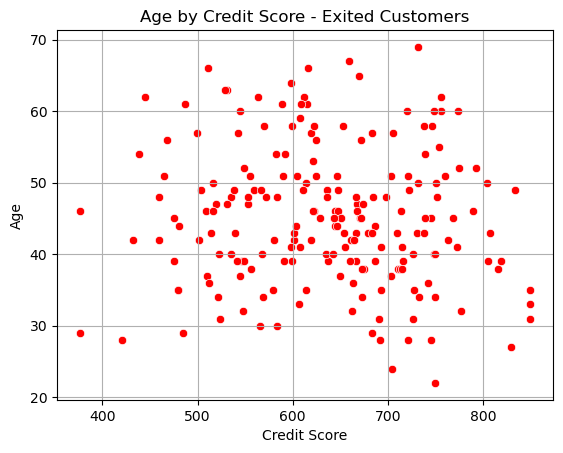

In [49]:
#### Scatterplot: Age vs. Credit Score

exited_credit_score = sns.scatterplot(x = 'Credit Score', y = 'Age', data = df_exited_cx_checked, color = 'red')
plt.title('Age by Credit Score - Exited Customers')
exited_credit_score.set(xlabel = 'Credit Score', ylabel = 'Age')
plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/exited_credit_score.png'))

# Show the graph

plt.show()

## ACTIVE CUSTOMERS

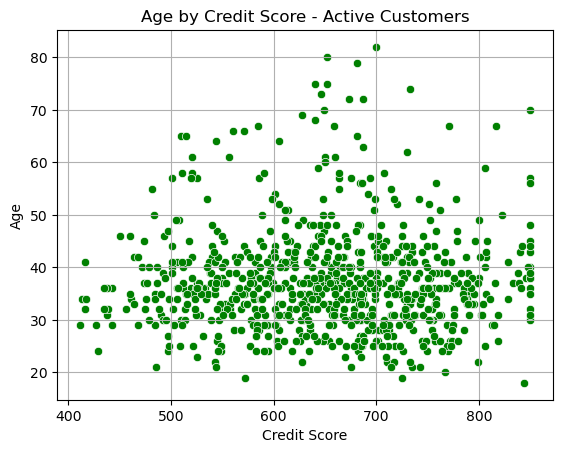

In [50]:
#### Scatterplot: Age vs. Credit Score

active_credit_score = sns.scatterplot(x = 'Credit Score', y = 'Age', data = df_active_cx_checked, color = 'green')
plt.title('Age by Credit Score - Active Customers')
active_credit_score.set(xlabel = 'Credit Score', ylabel = 'Age')
plt.grid()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/active_credit_score.png'))

# Show the graph

plt.show()

In [51]:
# Import data

df_pigebank = pd.read_excel(os.path.join(path, '02 Data','Original Data', 'pigebank_client_cleaned_dataset.xlsx'))

In [52]:
# Rename columns

df_pigebank.rename(columns = {'NumOfProducts': 'Number of Products', 'HasCrCard?': 'Has Credit Card', 'IsActiveMember': 'Active Member', 'ExitedFromBank?': 'Ex-Customer'}, inplace = True)

In [53]:
# Removal of column 'Row_Number'

df_pigebank = df_pigebank.drop(columns =['Row_Number'])

In [54]:
# Removal of column 'Modified line'

df_pigebank = df_pigebank.drop(columns =['Modified line'])

In [55]:
# Removal of column 'Last_Name' for PII reasons

df_pigebank = df_pigebank.drop(columns =['Last_Name'])

In [56]:
# Deriving columns with loc()

# Status Flag 'Active Customer'

df_pigebank.loc[df_pigebank['Ex-Customer'] == 0, 'status_flag'] = 'active customer'

# Status Flag 'Exited Customer'

df_pigebank.loc[df_pigebank['Ex-Customer'] == 1, 'status_flag'] = 'exited customer'

# Check output

df_pigebank['status_flag'].value_counts(dropna = False)

status_flag
active customer    787
exited customer    204
Name: count, dtype: int64

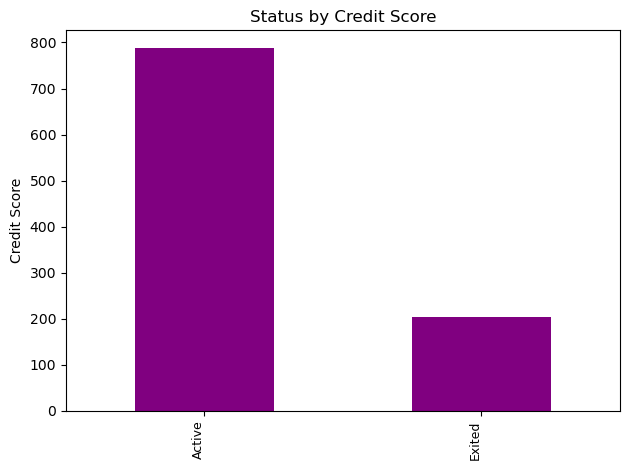

In [57]:
# Create a bar chart

credit_score_status = df_pigebank['Ex-Customer'].value_counts().plot.bar(title = 'Status by Credit Score', xlabel = '', ylabel = 'Credit Score', color = 'purple')


bars = ('Active', 'Exited')

y_pos = np.arange(len(bars))

# Use the plt.xticks function to custom labels

plt.xticks(y_pos, bars, color = 'black', rotation = 90, fontsize = '9', horizontalalignment='right')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/credit_score_status.png'))

plt.show()


# 4. Country, Gender

In [ ]:
## ALL CUSTOMERS

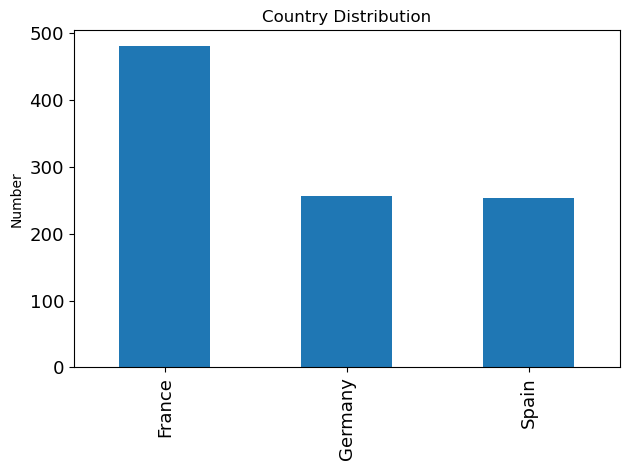

In [58]:
# Bar chart of 'Country'

# Format x-axis

country_dist = df_checked['Country'].value_counts().plot.bar(title = 'Country Distribution', fontsize = 13, ylabel = 'Number', xlabel = '')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/country_dist.png'))

# Show the graph

plt.show()

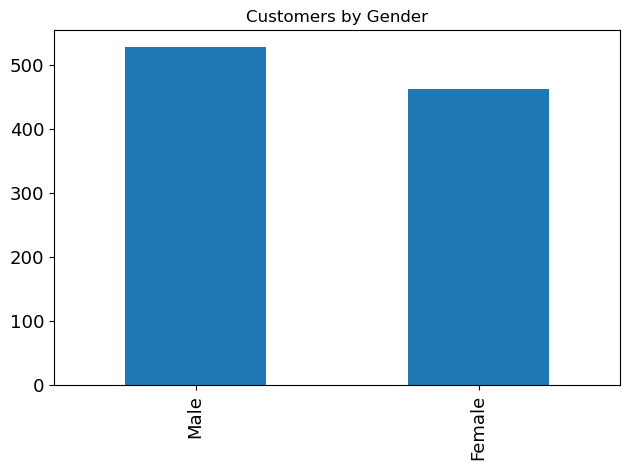

In [59]:
# Bar chart of 'Gender'

# Format x-axis

gender_all = df_checked['Gender'].value_counts().plot.bar(title = 'Customers by Gender', fontsize = 13, xlabel = '')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/gender_all.png'))

# Show the graph

plt.show()

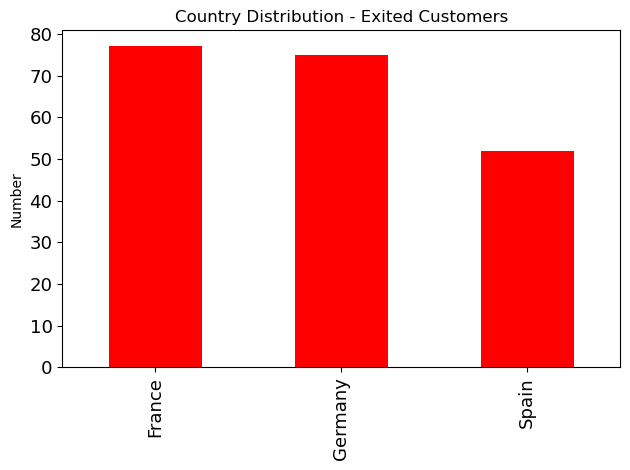

In [60]:
# Bar chart of 'Country'

# Format x-axis

country_dist_exited = df_exited_cx_checked['Country'].value_counts().plot.bar(title = 'Country Distribution - Exited Customers', fontsize = 13, color = 'red', ylabel = 'Number', xlabel = '')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/country_dist_exited.png'))

# Show the graph

plt.show()

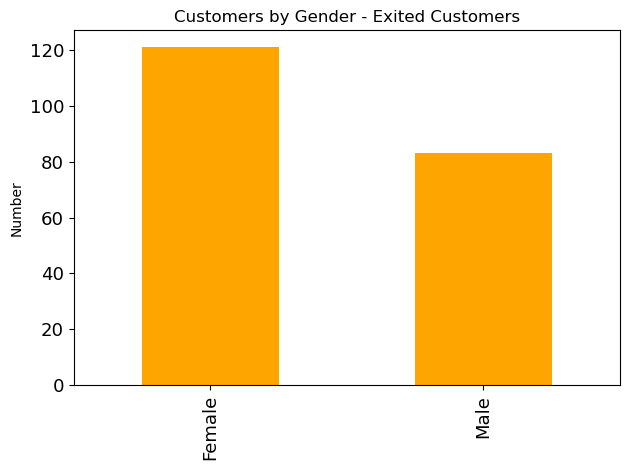

In [61]:
# Bar chart of 'Gender'

# Format x-axis

gender_exited = df_exited_cx_checked['Gender'].value_counts().plot.bar(title = 'Customers by Gender - Exited Customers', fontsize = 13, ylabel = 'Number', xlabel = '', color = 'orange')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/gender_exited.png'))

# Show the graph

plt.show()

## ACTIVE CUSTOMERS

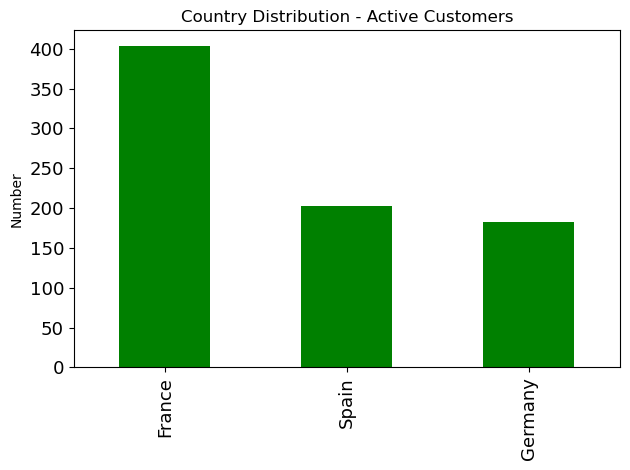

In [62]:
# Bar chart of 'Country'

# Format x-axis

country_dist_active = df_active_cx_checked['Country'].value_counts().plot.bar(title = 'Country Distribution - Active Customers', fontsize = 13, color = 'green', ylabel = 'Number', xlabel = '')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/country_dist_active.png'))

# Show the graph

plt.show()

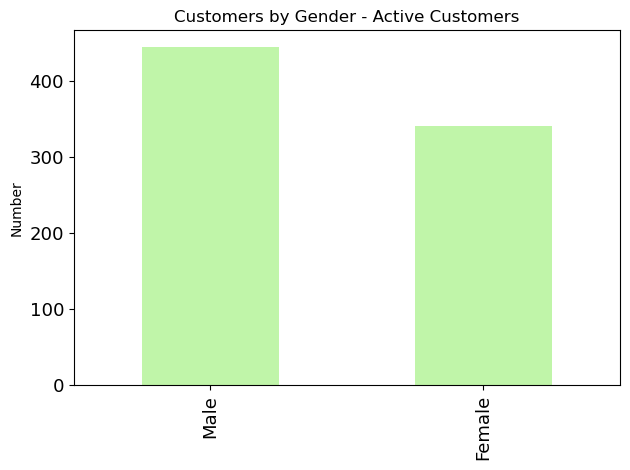

In [63]:
# Bar chart of 'Gender'

# Format x-axis

gender_active = df_active_cx_checked['Gender'].value_counts().plot.bar(title = 'Customers by Gender - Active Customers', fontsize = 13, ylabel = 'Number', xlabel = '', color = '#c0f5a9')

plt.tight_layout()

plt.savefig(os.path.join(path, '04 Analysis/Visualizations/gender_active.png'))

# Show the graph

plt.show()